In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
def generate_report(directory):

    #print("Generating report for: ", directory)
    os.system("AMDuProfCLI report -i " + directory + " > /dev/null")


In [51]:
def plot_with_confidence_interval(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    # sorting delle ascisse e delle ordinate
    

    
    # Genera il grafico con l'intervallo di confidenza
    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()

    
def plot_with_confidence_interval_log(x_values, y_mean, conf, color, marker, y_label, title, save_path):
    
    # Genera il grafico con l'intervallo di confidenza
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.errorbar(x_values, y_mean, yerr=conf, color=color, marker=marker, label=y_label)
    ax.set_xlabel('Dimensione dell\'array (Esponente della potenza di due)')
    ax.set_ylabel(y_label, color=color)
    ax.set_title(title)
    ax.set_xscale('log', base=2)
    plt.tight_layout()
    # plt.savefig(save_path)
    plt.show()
    

# Funzione per leggere i dati e calcolare le statistiche
def read_data_and_calculate_statistics(directory):
    elapsed_times = []


    for dir in os.listdir(directory):
        #print("dirint: ", dir)
        #print(os.listdir(directory + "/" + dir))
        if 'report.csv' not in os.listdir(directory + "/" + dir):
            generate_report(os.path.join(directory, dir))

        
        #print(os.path.join(directory, dir, 'report.csv'))
        with open(os.path.join(directory, dir, 'report.csv')) as f:
            df = f.readlines()

            try:
                elapsed_time = float(df[44].split(',')[1].replace('"', '').split(' ')[0])*1000
                elapsed_times.append(elapsed_time)
            except:
                print("Errore nel calcolo del tempo di esecuzione per: ", os.path.join(directory, dir))
                continue

            
            

    mean_elapsed_times = np.mean(elapsed_times)

    #calcolo intervallo di confidenza
    ci = 1.96 * np.std(elapsed_times) / np.sqrt(len(elapsed_times))

   

    return mean_elapsed_times, ci
            
            

    

        
            

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
done dir 1
done dir 2
done dir 3
done dir 4
done dir 5
done dir 6
done dir 7
Errore nel calcolo del tempo di esecuzione per:  /home/enrico/Documents/UNI/CA-lab/Computer-Architecture-Project/results/set-up/8/AMDuProf-seq-Threading_Apr-09-2024_18-36-00
Errore nel calcolo del tempo di esecuzione per:  /home/enrico/Documents/UNI/CA-lab/Computer-Architecture-Project/results/set-up/8/AMDuProf-seq-Threading_Apr-09-2024_18-35-57
done dir 8
Errore nel calcolo del tempo di esecuzione per:  /home/enrico/Documents/UNI/CA-lab/Computer-Architecture-Project/results/set-up/9/AMDuProf-seq-Threading_Apr-09-2024_18-36-19
done dir 9
done dir 10
done dir 11
done dir 12
done dir 13
done dir 14
done dir 15


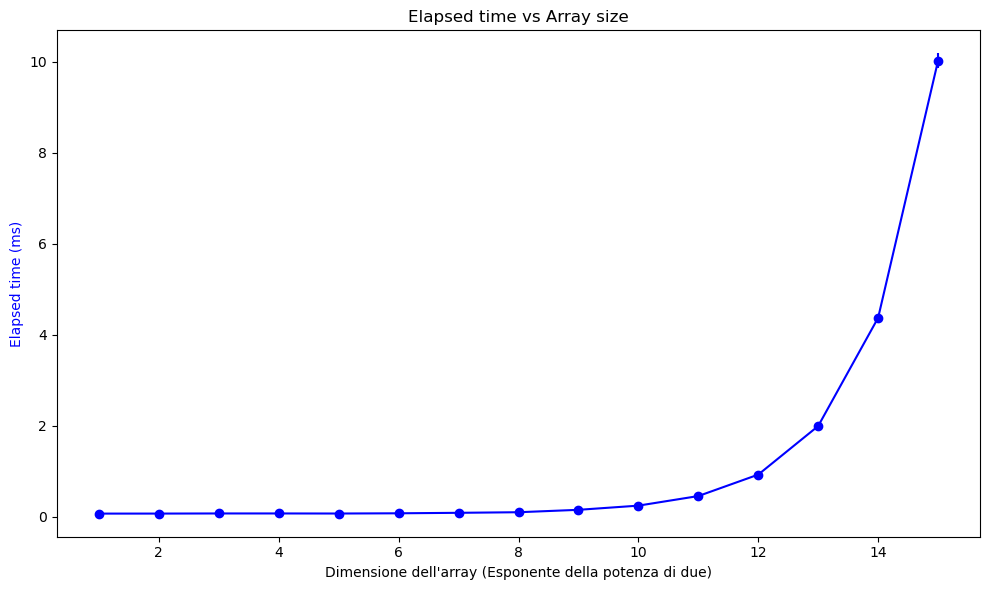

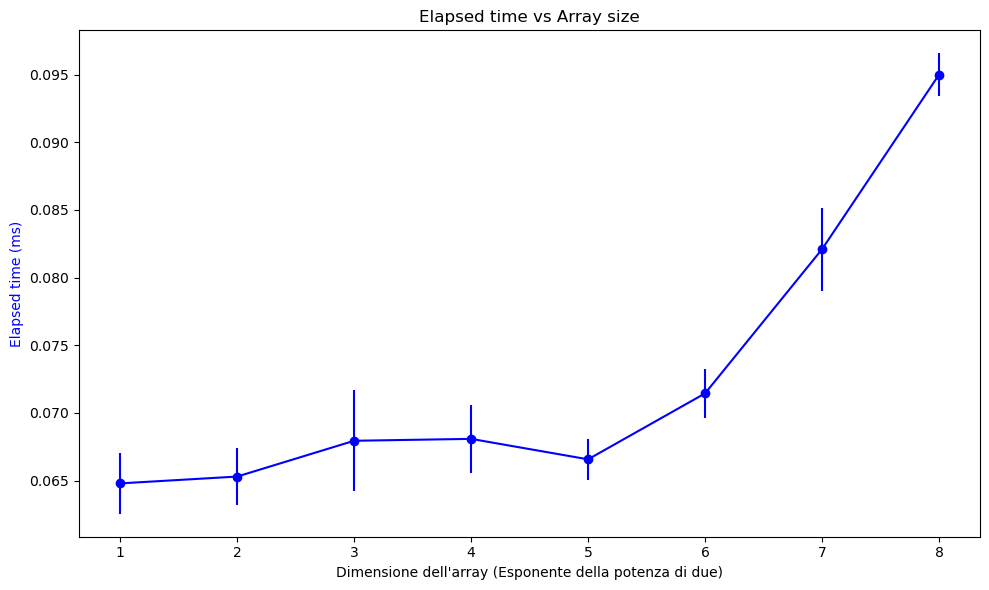

In [52]:

# Utilizzo della funzione per calcolare statistiche e generare il grafico
# Imposta i valori necessari per il percorso, le ripetizioni e il numero di configurazioni
path = os.getcwd()

#print(path)
path = os.path.join(path, "results", "set-up")
#print(path)

# Leggi i dati e calcola le statistiche
mean_elapsed_times = []
cis = []
sizes = []

list_of_dirs = os.listdir(path)
#ordino le directory per nome

list_of_dirs = [int(x) for x in list_of_dirs if x.isdigit()]

for i in range(len(list_of_dirs)):
    for j in range(i, len(list_of_dirs)):
        if list_of_dirs[i] > list_of_dirs[j]:
            list_of_dirs[i], list_of_dirs[j] = list_of_dirs[j], list_of_dirs[i]



print(list_of_dirs)



for dirs in list_of_dirs:
    #print("directory: ", dirs)
    try:
        size = int(dirs)
        
        #print(os.path.join(path, dirs))
        mean_elapsed_time, ci = read_data_and_calculate_statistics(os.path.join(path, str(dirs)))
        sizes.append(size)
        mean_elapsed_times.append(mean_elapsed_time)
        cis.append(ci)
    except ValueError:
        continue
    print("done dir", dirs)

#sort dei dati



# Genera il grafico
plot_with_confidence_interval(sizes, mean_elapsed_times, cis, 'blue', 'o', 'Elapsed time (ms)', 'Elapsed time vs Array size', 'elapsed_time_vs_array_size.png')

#plot the first 5 elements
plot_with_confidence_interval(sizes[:8], mean_elapsed_times[:8], cis[:8], 'blue', 'o', 'Elapsed time (ms)', 'Elapsed time vs Array size', 'elapsed_time_vs_array_size.png')

#plot log
